In [49]:
import numpy as np
import pandas as pd
import sympy 
from sympy import Symbol
from sympy import *
#from numpy import *
from matplotlib.pyplot import *
from sympy.plotting import plot3d
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import plot_implicit
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [50]:
ex_data = pd.read_csv('../../exams.csv', header=None, names=['Examen 1', 'Examen 2', 'Aceptado'])
ex_data.head()

,Examen 1,Examen 2,Aceptado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


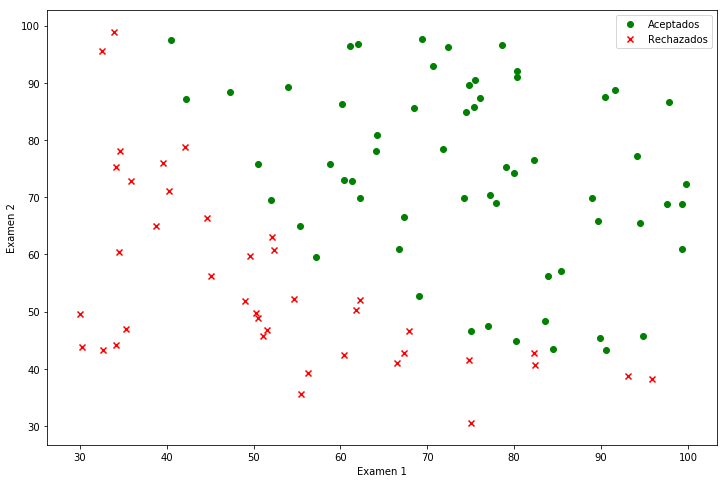

In [51]:
aprobados = ex_data[ex_data['Aceptado'].isin([1])]
rechazados = ex_data[ex_data['Aceptado'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(aprobados['Examen 1'], aprobados['Examen 2'], c='g', marker='o', label='Aceptados')
ax.scatter(rechazados['Examen 1'], rechazados['Examen 2'], c='r', marker='x', label='Rechazados')
ax.legend()
ax.set_xlabel('Examen 1')
ax.set_ylabel('Examen 2')

In [52]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))
#cosas matematicas mamadoras
#sirve para algo

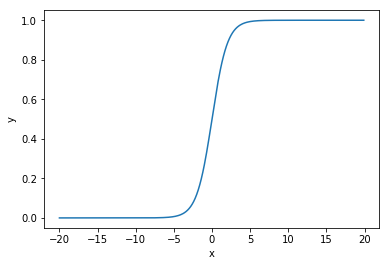

In [53]:
xs = np.arange(-20,20, 0.1)
ys = sigmoide(xs)
plot(xs, ys)
ylabel('y')
xlabel('x')
show()

In [54]:
def costo(Teta, X, Y):
    Teta = np.matrix(Teta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    A = np.multiply(-Y, np.log(sigmoide(X * Teta.T)))
    B = np.multiply((1 - Y), np.log(1 - sigmoide(X * Teta.T)))
    return np.sum(A - B) / (len(X))

#castigar que no te equivoques


In [55]:
ex_data.head()

,Examen 1,Examen 2,Aceptado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [56]:

ex_data.insert(0, 'Ones', 1)

cs = ex_data.shape[1]
X = ex_data.iloc[:,0:cs-1]
Y = ex_data.iloc[:,cs-1:cs]

X = np.array(X.values)
Y = np.array(Y.values)
Teta = np.zeros(3)

In [57]:
X.shape, Y.shape, Teta.shape

((100, 3), (100, 1), (3,))

In [58]:
costo(Teta,X,Y)

0.69314718055994529

In [59]:
def gradient(teta, x, y):
    teta = np.matrix(teta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(teta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoide(x * teta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
    
    return grad

In [60]:
gradient(Teta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

In [61]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costo, x0=Teta, fprime=gradient, args=(X, Y))
result

(array([-25.16131868,   0.20623159,   0.20147149]), 36, 0)

In [62]:
costo(result[0], X, Y)

0.20349770158947439

In [63]:
def predict(theta, X):
    probability = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [64]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)


accuracy = 89%
